# TensorFlow Tutorial

В предыдущих лабораторных работах вы всегда использовали numpy для построения нейронных сетей. Теперь мы изучим систему/фреймворк глубокого обучения, который позволит легче строить нейронные сети. Фреймворки машинного обучения, такие как TensorFlow, Torch, Caffe, Keras и многие другие, позволяют значительно ускорить развитие машинного обучения. Все эти фреймворки также имеют много документации, которую вы должны свободно читать. В этом задании вы научитесь делать следующее в TensorFlow:

- Инициализация переменных
- Запуск своей сессии
- Реализация алгоритма обучения 
- Реализация нейронной сети

Фреймворки программирования могут не только сократить время кодирования, но иногда также выполнять оптимизацию, которая ускоряет ваш код.

## 1 - Изучение библиотеки Tensorflow

In [5]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

Теперь, когда вы импортировали библиотеку, мы исследуем её различные приложения. Вы начнете с примера, где мы рассчитаем потерю на одном тренировочном примере. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [27]:
y_hat = tf.constant(36, name='y_hat')     # определим y_hat как константу. Установим в 36.
y = tf.constant(39, name='y')             # определим y. Установим в 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # создадим переменную для расчёта потерь

init = tf.global_variables_initializer()  # процесс инициализации запускается после определения всех переменных (session.run(init)),
                                          # переменная потерь будет инициализирована и готова к вычислению
with tf.Session() as session:             # Создайте сеанс и выведите выходные параметры
    session.run(init)                     # инициализация переменных
    print(session.run(loss))              # вывод потерь

9


Написание и запуск программ на TensorFlow включает следующие шаги:

1. Создание тензоров (переменных) которые еще не запущены/не вычислены.
2. Запишите операции с этими тензорами.
3. Инициализация тензоров. 
4. Создание сессии. 
5. Запуск сессии. Это позволит выполнить операции, которые вы реализовали ранее.

Поэтому, когда мы создавали переменную для потери, мы просто определяли потерю как функцию от других величин, но не оценивали ее значение. Чтобы оценить его, мы должны были запустить `init = tf.global_variables_initializer()`. Это инициализировало переменную потерь, и в последней строке мы, наконец, смогли оценить значение `loss` и вывести значение.

Теперь давайте рассмотрим простой пример. Запустите ячейку ниже:

In [7]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


Как и ожидалось, вы не увидите 20! Вы получили тензор, говорящий, что результатом является тензор, который не имеет атрибута shape и имеет тип "int32". Все, что вы сделали, было помещено в "график вычислений", но вы еще не выполнили это вычисление. Чтобы действительно умножить эти два числа, вам нужно будет создать сеанс и запустить его.

In [8]:
sess = tf.Session()
print(sess.run(c))

20


Отлично! Подводя итог, не забудьте инициализировать переменные, создать сеанс и запустить операции внутри сеанса. 

Далее, вы также должны знать о заполнителях (placeholders). placeholders - это объект, значение которого можно указать только позже. 
Чтобы указать значения для заполнителя, можно передать значения с помощью "справочника каналов" (переменная `feed_dict`). Ниже мы создали заполнитель для x. это позволяет нам передавать число позже, когда мы запускаем сеанс.

In [9]:
# Изменение x в feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


Когда вы впервые определили `x`, вам не нужно было указывать для него значение. placeholder - это просто переменная, которой вы будете присваивать данные только позже, при запуске сеанса. Часто говорят, что **feed data** это заполнитель при запуске сеанса.

Вот что происходит: когда вы указываете операции, необходимые для вычисления, вы говорите TensorFlow, как построить вычислительный граф. Граф вычислений может иметь некоторые заполнители, значения которых вы укажете только позже. Наконец, когда вы запускаете сеанс,вы говорите TensorFlow выполнить график вычислений.

### 1.1 - Линейная функция

Давайте начнем это упражнение с вычисления следующего уравнения: $Y = WX + b$, где $W$ и $X$ случайные матрицы и b вектор случайных значений. 

**Упражнение**: Вычислить $WX + b$ где $W, X$, и $b$ получаются из случайного нормального распределения. W размером (4, 3), X - (3,1) и b - (4,1). В качестве примера, вот как можно определить константу X, которая имеет форму (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")
```
Возможно, вам помогут следующие функции: 
- tf.matmul(..., ...) перемножение матриц
- tf.add(..., ...) сложение
- np.random.randn(...) случайная инициализация

In [10]:
# ОЦЕНИВАЕМОЕ: linear_function

def linear_function():
    """
    Реализация линейной функции: 
            инициализация W, который должен быть случайным тензором размером (4,3)
            инициализация X, который должен быть случайным тензором размером (3,1)
            инициализация b, который должен быть случайным тензором размером (4,1)
    Returns: 
    result -- запуск сессии Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (4 строки кода)
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W, X), b)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ### 
    
    # Создание сессии с использованием tf.Session() и запуск с использованием sess.run(...)
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ###
    sess = tf.Session()
    result = sess.run(Y)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ### 
    
    # Закрытие сессии
    sess.close()

    return result

In [11]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Ожидаемый результат ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 
</table> 

### 1.2 - Вычисление sigmoid 

Отлично! Ранее вы реализовали линейную функцию. Tensorflow предлагает множество часто используемых функций нейронной сети, таких как `tf.sigmoid` и `tf.softmax`. Для этого упражнения вычислим сигмовидную функцию входного сигнала. 

Вы будете выполнять это упражнение, используя переменную-заполнитель `x`. При запуске сеанса вы должны использовать feed dictionary  для передачи входных данных `z`. В этом упражнении вам придется (1) создать placeholder `x`, (2) определить операции, необходимые для вычисления сигмоиды с помощью `tf.sigmoid`, а затем (3) запустить сеанс.

** Упражнение **: Реализовать sigmoid function. Необходимо использовать следующее: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`

Обратите внимание, что существует два способа создания и использования сеансов в tensorflow:

**Метод 1:**
```python
sess = tf.Session()
# Запуск инициализации параметров (если необходимо), запуск операций
result = sess.run(..., feed_dict = {...})
sess.close() # закрытие сессии
```
**Метод 2:**
```python
with tf.Session() as sess: 
    # Запуск инициализации параметров (если необходимо), запуск операций
    result = sess.run(..., feed_dict = {...})
    # закрытие сессии произойдёт автоматически
```


In [12]:
# ОЦЕНИВАЕМОЕ: sigmoid

def sigmoid(z):
    """
    Вычисление sigmoid для z
    
    Arguments:
    z -- входное значение, скаляр или вектор
    
    Returns: 
    results -- sigmoid по z
    """
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### ( ~ 4 строки кода)
    # Создание placeholder для x. Название переменной - 'x'.
    x = tf.placeholder(tf.float32, name='x')

    # Вычисление sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # Создайте сеанс и запустите его. Используйте метод 2, описанный выше.
    # Необходимо использовать feed_dict чтобы передать z значение в x. 
    with tf.Session() as sess: 
        result = sess.run(sigmoid, feed_dict = {x: z})
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    return result

In [14]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(15) = " + str(sigmoid(15)))

sigmoid(0) = 0.5
sigmoid(15) = 0.99999964


*** Ожидаемый результат ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.99999964
</td>
</tr> 
</table> 

<font color='blue'>
**Что необходимо помнить**:

1. Создание placeholders
2. Укажите график вычислений, соответствующий операциям, которые вы хотите вычислить
3. Создание сеанса
4. Запустите сеанс, используя feed dictionary, если необходимо, чтобы указать значения переменных - заполнителей.

### 1.3 -  Вычисление потерь

Вы также можете использовать встроенную функцию для вычисления потерь нейронной сети. Поэтому вместо того, чтобы писать код для вычисления этой функции для $a^{[2](i)}$ и $y^{(i)}$ по i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{1}$$

вы можете сделать в одну строку кода в tensorflow!

**Упражнение**: Реализуйте  функцию потерь кросс-энтропия. Функция, которую вы будете использовать, является: 

- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

Ваш код на вход получает `z`, вычисляет sigmoid (получает `a`) и затем вычисляет потери с использование кросс-энтропии $J$. Все это можно сделать с помощью одного вызова `tf.nn.sigmoid_cross_entropy_with_logits`, которая вычисляет:

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [23]:
# ОЦЕНИВАЕМОЕ: cost

def cost(logits, labels):
    """
    Вычисление потерь с использование сигмоиды и кросс-энтропии
        
    Arguments:
    logits -- вектор, содержащий z, выход последнего линейного блока (перед функцией активацией)
    labels -- вектор меток y (1 or 0) 
    
    Примечание: то, что мы называем "Z" и "Y" в этом классе, соответственно, называется "logits" и "labels" в TensorFlow 
    документации. Поэтому logits будут поступать в z, а labels в Y.
    
    Returns:
    cost -- запускает сеанс расчёта функции потерь (формула (2))
    """
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### 
    
    # Создание  placeholders для "logits" (z) и "labels" (y) (~ 2 строки кода)
    z = tf.placeholder(tf.float32, name='logits')
    y = tf.placeholder(tf.float32, name='labels')
    
    # Использование функции потерь (~ 1 строка кода)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,  labels=y)
    
    # Создание сессии (~ 1 строка кода).
    sess = tf.Session()
    
    # Запуск сессии (~ 1 строка кода).
    cost = sess.run(cost, feed_dict={z:logits, y:labels})
    
    # Закрытие сессии (~ 1 строка кода).
    sess.close()
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return cost

In [24]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.41385433 0.39956614]


** Ожидаемый результат** : 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Реализация One Hot encodings

Много раз в глубоком обучении вы будете иметь вектор y с числами в диапазоне от 0 до C-1, где C-количество классов. Если C, например, 4, то у вас может быть следующий вектор y, который вам нужно будет преобразовать следующим образом:

<img src="images/onehot.png" style="width:600px;height:150px;">

Это называется "one hot" кодировка, потому что в преобразованном представлении ровно один элемент каждого столбца является "hot" (то есть равным 1). Чтобы сделать это преобразование в numpy, вам, возможно, придется написать несколько строки кода. В tensorflow можно использовать одну строку кода:

- tf.one_hot(labels, depth, axis) 

**Упражнение:** Реализуйте функцию ниже, чтобы взять один вектор меток и общее число классов $C$, и вернуть one hot encoding. Используйте `tf.one_hot()`. 

In [25]:
# ОЦЕНИВАЕМОЕ: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Создание матрицы где i-я строка соответствует i-мк классу и j-й колонке соответствующий j-му обучающему примеру. Итак, если 
    пример j имеет метку i. 
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Тогда запись (i, j) будет равна 1.
                     
    Arguments:
    labels -- вектор меток 
    C -- количество классов
    
    Returns: 
    one_hot -- one hot матрица
    """
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ###
    
    # Создание a tf.constant равной C (глубина), 'C'. (~ 1 строка кода)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot (~ 1 строка кода)
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Создание сессии (~ 1 строка кода)
    sess = tf.Session()
    
    # Запуск сессии (~ 1 строка кода)
    one_hot = sess.run(one_hot_matrix)
    
    # Закрытие сессии (~ 1 line)
    sess.close()
    
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return one_hot

In [26]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Ожидаемый результат**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Инициализация нулями и единицами

В данной части вы изучите как инициализировать вектор нулями и единицами. 
Функция инициализации единичной матрицы: `tf.ones()`. 
Функция инициализации матрицы нулей: `tf.zeros()`. 
Данные функции принимают на вход размер матриц, а на выходе получаются матрицы нулей и единиц соответственно.

**Упражнение:** Реализуйте функцию ниже, чтобы принять размер и вернуть массив. 
 - tf.ones(shape)


In [28]:
# ОЦЕНИВАЕМОЕ: ones

def ones(shape):
    """
    Создание массива единиц с заданным размером
    
    Arguments:
    shape -- размер массива, который вы хотите создать
        
    Returns: 
    ones -- массив, содержащий только единицы
    """
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ###
    
    # Создание "единичного" тензора с использованием tf.ones(...). (~ 1 срока кода)
    ones = tf.ones(shape)
    
    # Создание сессии (~ 1 срока кода)
    sess = tf.Session()
    
    # Запуск сессии (~ 1 срока кода)
    ones = sess.run(ones)
    
    # Закрытие сессии (~ 1 срока кода)
    sess.close()
    
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    return ones

In [31]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


**Ожидаемый результат:**

<table> 
    <tr> 
        <td>
            **ones**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

# 2 - Построение нейронной сети с использованием tensorflow

В данной части лабораторной работы необходимо построить нейронную сеть с использованием tensorflow. Помните, что существует две части для реализации модели:

- Создание графа вычислений
- Запуск графа вычислений

### 2.0 - Постановка задачи: SIGNS Dataset

Ваша задача-построить алгоритм, который облегчит общение человека с нарушениями речи с тем, кто не понимает язык жестов. 

- **Обучающий набор данных**: 1080 изображений (64 на 64 пикселей) знаков, представляющих числа с 0 до 5 (180 изображений на одно число).
- **Тестовый набор данных**: 120 изображений (64 на 64 пикселей) знаков, представляющих числа с 0 до 5 (20 изображений на одно число).

Обратите внимание, что это подмножество набора данных SIGNS dataset. Полный набор данных содержит гораздо больше знаков.

Вот примеры для каждого числа, а также объяснение того, как представлены метки. Это исходные снимки, до снижения размерности изображения до 64 на 64 пикселя.

<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Рисунок 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


In [32]:
# Загрузка датасета
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Измените индекс и запустите ячейку, чтобы визуализировать некоторые примеры в наборе данных.

y = 2


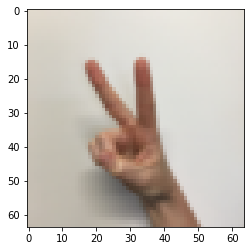

In [35]:
# Примеры изображений
index = 4
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

Как обычно, вы преобразуете в вектор набор данных изображений, а затем нормализуете его путем деления на 255. Кроме того, вы преобразуете каждую метку в один горячий вектор, как показано на Рис.1. Запустите ячейку ниже, чтобы сделать это.

In [36]:
# Преобразование в вектор матрицы изображений
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Нормализация обучающего и тестового вектора
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Конвертирование меток в One Hot матрицу
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("Количество обучающих примеров = " + str(X_train.shape[1]))
print ("Количество тестовых примеров = " + str(X_test.shape[1]))
print ("X_train размер: " + str(X_train.shape))
print ("Y_train размер: " + str(Y_train.shape))
print ("X_test размер: " + str(X_test.shape))
print ("Y_test размер: " + str(Y_test.shape))

Количество обучающих примеров = 1080
Количество тестовых примеров = 120
X_train размер: (12288, 1080)
Y_train размер: (6, 1080)
X_test размер: (12288, 120)
Y_test размер: (6, 120)


**Обратите внимание**, что 12288 происходит от $64 \times 64 \times 3$. Каждое изображение квадратное, 64 на 64 пикселя, и 3 для цветовых каналов - RGB.

**Your goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a tensorflow model that is almost the same as one you have previously built in numpy for cat recognition (but now using a softmax output). It is a great occasion to compare your numpy implementation to the tensorflow one. 

**Ваша цель** - построить алгоритм, способный распознавать знак с высокой точностью. Для этого необходимо построить модель с использованием tensorflow, которая почти совпадает с той, которую строилась ранее в numpy для распознавания кошек (но теперь в качестве выходной функцией активации используется - softmax). 

**Модель** - *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. SIGMOID преобразован в SOFTMAX. SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### 2.1 - Создание placeholders

Ваша первая задача - создать placeholders для `X` и `Y`. Это позволит передавать обучающую выборку во время выполнения сеанса.

**Упражнение:** Реализуйте функцию по созданию placeholders с использованием tensorflow.

In [37]:
# ОЦЕНИВАЕМОЕ: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Создание placeholders для tensorflow сессии.
    
    Arguments:
    n_x -- скаляр, размер входного вектора (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- sскаляр, количество классов (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder для входной матрицы признаков [n_x, None] и dtype "float"
    Y -- placeholder для входных меток [n_y, None] и dtype "float"
    
    Подсказка:
    - Необходимо использовать None, потому что это позволит быть гибкими в отношении количества примеров, которые необходимо 
    использовать для placeholder. На самом деле, количество примеров во время теста/обучения отличается
    """

    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~ 2 строки кода)
    X = tf.placeholder(tf.float32, [n_x, None])
    Y = tf.placeholder(tf.float32, [n_y, None])
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return X, Y

In [38]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


**Ожидаемый результат**: 

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(10, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Инициализация параметров

Следующая задача это инициализировать параметры с использованием tensorflow.

**Упражнение:** Реализуйте функцию по инициализации параметров с использованием tensorflow. Необходимо использовать Xavier Initialization для весов и Zero Initialization для смещений. Формы приведены ниже. Пример для W1 и b1:

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
Пожалуйста используйте `seed = 1`, тогда результаты будут совпадать с верными.

In [42]:
# ОЦЕНИВАЕМОЕ: initialize_parameters

def initialize_parameters():
    """
    Инициализируйте параметры для построения нейронной сети с использованием tensorflow. 
    Размер:
            W1 : [25, 12288]
            b1 : [25, 1]
            W2 : [12, 25]
            b2 : [12, 1]
            W3 : [6, 12]
            b3 : [6, 1]
    
    Returns:
    parameters -- словарь тензоров для: W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)
        
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~ 6 строки кода)
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [43]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Ожидаемый результат**: 

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

### 2.3 - Прямое распространение с использованием tensorflow 

Теперь необходимо реализовать модуль прямого распространения с использованием tensorflow. Функция получает словарь параметров и совершит прямой проход. Функции, которые необходимо использовать:

- `tf.add(...,...)`
- `tf.matmul(...,...)`
- `tf.nn.relu(...)` примените в качестве функции активации ReLU

**Упражнение:** Реализуйте прямой проход по нейронной сети с использованием  tensorflow. Важно отметить, что прямое распространение останавливается на `z3`. Причина в том, что в tensorflow выход последнего линейного слоя задается как вход функции, вычисляющей потери. Поэтому вычисление `a3` не нужно!


In [48]:
# ОЦЕНИВАЕМОЕ: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~ 5 строки кода)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                              # Z3 = np.dot(W3,Z2) + b3
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return Z3

In [49]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


**Ожидаемый результат**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, ?), dtype=float32)
        </td>
    </tr>

</table>

You may have noticed that the forward propagation doesn't output any cache. You will understand why below, when we get to brackpropagation.

### 2.4 Вычисление потерь

Как было замечено ранее, очень легко вычислить потери, используя:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**Упражнение**: Реализовать вычисление функции потерь. 
- Важно помнить что "`logits`" и "`labels`" будут на входе `tf.nn.softmax_cross_entropy_with_logits` с размером (number of examples, num_classes).
- С другой стороны, `tf.reduce_mean` basically does the summation over the examples.

In [50]:
# ОЦЕНИВАЕМОЕ: compute_cost 

def compute_cost(Z3, Y):
    """
    Вычисление потерь
    
    Arguments:
    Z3 -- выход прямого распространения (выход с последнего LINEAR слоя), размером (6, number of examples)
    Y -- вектор меток placeholder, размером таким же как и Z3
    
    Returns:
    cost - тензор потерь
    """
    
    # чтобы соответствовать требованию tensorflow для tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return cost

In [51]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


**Ожидаемый результат**: 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 2.5 - Обратное распространение & обновление параметров

Именно в данной части можно прочувствовать всё преимущество фреймворков. Всё обратное распространение и обновление параметров осуществляется в 1й строке кода.

После того, как вы вычислите функцию затрат. Вы создадите объект "`optimizer`". Вы должны вызвать этот объект вместе со стоимостью при запуске tf.session. При вызове он выполнит оптимизацию по заданной стоимости с выбранным методом и скоростью обучения.

Для примера, оптимизация с использованием градиентного спуска выглядит следующим образом:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

Чтобы реализовать оптимизацию необходимо сделать:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

Это вычисляет обратное распространение, проходя через граф tensorflow в обратном порядке. От потерь к входу.

**Заметка** В коде вы часто может встретить знак `_` - переменная для хранения значений, которые нам не нужно будет использовать позже. Здесь `_` принимает оцененное значение `optimizer`, которое нам не нужно (а `c` = это значение `cost`) 

### 2.6 - Построение модели

Далее необходимо собрать все части вместе

**Упражнение:** Реализуйте модель. Необходимо вызывать функции, которые были реализованы ранее.

In [52]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Реализация 3-х слойной нейронной сети с использованием tensorflow: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- обучающая выборка (input size = 12288, number of training examples = 1080)
    Y_train -- метки для обучения (output size = 6, number of training examples = 1080)
    X_test -- тестовая выборка (input size = 12288, number of training examples = 120)
    Y_test -- метки для тестирования (output size = 6, number of test examples = 120)
    learning_rate -- скорость градиентного спуска
    num_epochs -- количество эпох обучения
    minibatch_size -- размер мини-пакета
    print_cost -- вывод результатов каждые 100 эпох
    
    Returns:
    parameters -- параметры обученной модель, которые используются для предсказания.
    """
    
    ops.reset_default_graph()                         # возможность повторного запуска модели без перезаписи переменных tf
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape                          # (n_x: input size, m : кол-во примеров в обучающем наборе)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []
    
    # Создание Placeholders размером (n_x, n_y)
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
    X, Y = create_placeholders(n_x, n_y)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

    # Инициализация параметров
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
    parameters = initialize_parameters()
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    # Прямое распространение: построение графа прямого распространения с использованием tensorflow
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
    Z3 = forward_propagation(X, parameters)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    # Функция потерь: добаление функции потерь в граф
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
    cost = compute_cost(Z3, Y)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    # Обратное распространение: определение функции оптимизации. Используется - AdamOptimizer.
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    # Инициализация всех переменных
    init = tf.global_variables_initializer()

    # Старт сессии с использованием tensorflow
    with tf.Session() as sess:
        
        # Запуск инициализации
        sess.run(init)
        
        # Начало обучения
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Определение потерь относительно эпохи
            num_minibatches = int(m / minibatch_size) # кол-во мини-пакетов - minibatch_size в обучающей выборке
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # выбор мини-пакета
                (minibatch_X, minibatch_Y) = minibatch
                
                # ВАЖНО: Строка, которая запускает граф для мини-пакета
                # Запуск сессии вызовом "optimizer" и "cost", feedict должен содержать мини-пакет (X,Y).
                ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (1 строка кода)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Вывод в результатов обучения на каждой 100-й эпохе
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # построение графика потерь
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # сохранение параметров в переменной
        parameters = sess.run(parameters)
        print ("Параметры обучены!")

        # Вычисление predict
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Вычисление accuracy на тестовой выборке
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Запустите следующую ячейку, чтобы обучить вашу модель! Обучение может занимать около 5 минут. Ваша "стоимость после эпохи 100" должна быть 1.016458. Если это не так, не тратьте время; прервите обучение, нажав на квадрат (⬛) в верхней строке записной книжки, и попробуйте исправить свой код. Если это правильная стоимость, сделайте перерыв и вернитесь через 5 минут!

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017030
Cost after epoch 200: 0.733547
Cost after epoch 300: 0.573116
Cost after epoch 400: 0.468681
Cost after epoch 500: 0.381269
Cost after epoch 600: 0.313752
Cost after epoch 700: 0.253742
Cost after epoch 800: 0.203653
Cost after epoch 900: 0.166515
Cost after epoch 1000: 0.145977
Cost after epoch 1100: 0.107423
Cost after epoch 1200: 0.086455
Cost after epoch 1300: 0.059329
Cost after epoch 1400: 0.052131


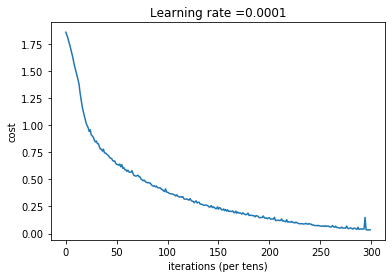

Параметры обучены!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [53]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Ожидаемый результат**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.999074
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.716667
        </td>
    </tr>
</table>

Прекрасно, ваш алгоритм может распознавать знаки, представляющие собой цифру от 0 до 5 с точность 71.7%.

**Идеи**:

- Ваша модель имеет слишком много параметров, поскольку хорошо описывает обучающую выборку. Однако, учитывая разницу между точностью на обучении и тесте, можно попытаться добавить регуляризацию L2 или dropout, чтобы уменьшить эффект переобучения.
- Сессию можно себе представить как блока кода, производящий обучения модели. Каждый раз, когда вы запускаете сеанс на мини-пакете, модель обучается и обновляет параметры. В общей сложности вы создали и запустили большое количество сессий (1500 эпох), пока не получили хорошо обученную модель.

### 2.7 - Тестирование на Ваших изображениях

Теперь вы можете сфотографировать свою руку и увидеть результат работы модели:

    1. Нажмите на "File" в верхней строке этой записной книжки, затем нажмите "Open".
    2. Добавьте свое изображение в каталог этой записной книжки Jupyter, в папку "images"
    3. Напишите имя вашего изображения в следующем блоке-кода
    4. Запустите код и проверьте работу алгоритма

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()
Predict: y = 3


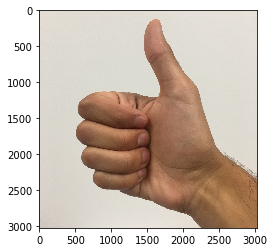

In [55]:
import scipy
from PIL import Image
from scipy import ndimage

## НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ##
my_image = "thumbs_up.jpg"
## ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Predict: y = " + str(np.squeeze(my_image_prediction)))

You indeed deserved a "thumbs-up" although as you can see the algorithm seems to classify it incorrectly. The reason is that the training set doesn't contain any "thumbs-up", so the model doesn't know how to deal with it! We call that a "mismatched data distribution" and it is one of the various of the next course on "Structuring Machine Learning Projects".

<font color='blue'>
**Что необходимо помнить?**:

- Tensorflow-это фреймоворк, используемый в глубоком обучении.
- Два основных класса объектов в tensorflow - это тензоры и операторы. 
- При написании кода в tensorflow необходимо выполнить следующие действия:
    - Создайте график, содержащий тензоры (Variables, Placeholders ...) и операции (tf.matmul, tf.add, ...)
    - Создание сессии
    - Инициализация сессии
    - Запуск сессии для вычисление графа
- Вы можете вычислить граф несколько раз, как вы видели в model()
- Обратное распространение и оптимизация выполняется автоматически при запуске сессии на объекте "optimizer".